# 초기 데이터 구성

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
from datetime import datetime, timedelta

xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

datas = {};
for col in xlsx:
    if col > 6: # startcol 7
        datas[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]
        
def datetime_range(start, end, delta):
        current = start
        while current < end:
                yield current
                current += delta
dts = [dt.strftime('%Y%m%d %H:%M') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(minutes = 15))]

df = pd.DataFrame(datas)

In [81]:
df = df.fillna(0)
sDatas = []

for idx in df['아파트1-104-1206']:
    sDatas.append(idx)

dts = [dt.strftime('%Y%m%d') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(days = 1))]

sData = {}
dtIdx = 0
for idx in range(3,len(sDatas),96):
    sData[dts[dtIdx]] = pd.Series(sDatas[idx: idx + 96])
    dtIdx += 1
sDf = pd.DataFrame(sData)
sDf = sDf.fillna(0)
initDf = sDf.copy()
sDf = sDf.T
sDf
initDf
sDf['date'] = sDf.index

month = []
for date in sDf['date']:
    month.append(date[4:6])

sDf['month'] = month
sDf = sDf[sDf['month'].isin(["03", "04", "05"])]
sDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,date,month
20180501,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,0.085,0.085,0.084,0.084,0.054,0.046,0.051,0.050,0.050,0.038,0.031,0.051,0.051,0.051,0.047,0.030,0.042,0.051,0.048,0.051,0.034,0.034,0.051,0.050,0.051,0.043,0.028,0.047,0.051,0.051,0.050,0.036,0.032,0.051,0.050,0.049,0.051,0.029,0.041,0.051,0.051,0.058,0.055,0.045,0.054,0.056,0.057,0.094,0.055,0.056,0.052,0.051,0.051,0.050,0.051,0.050,0.049,0.050,0.049,0.049,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.050,0.050,0.049,0.062,0.085,0.084,0.083,0.083,0.063,0.074,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,05
20180502,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,0.054,0.057,0.056,0.039,0.056,0.052,0.052,0.051,0.051,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.103,0.063,0.050,0.050,0.050,0.050,0.045,0.031,0.047,0.051,0.050,0.050,0.035,0.036,0.051,0.051,0.050,0.050,0.032,0.038,0.051,0.049,0.050,0.049,0.043,0.029,0.046,0.050,0.050,0.049,0.049,0.030,0.040,0.050,0.050,0.051,0.045,0.030,0.046,0.051,0.050,0.050,0.055,0.057,0.056,0.039,0.056,0.053,0.052,0.052,0.051,0.052,0.051,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,05
20180503,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,0.029,0.038,0.050,0.049,0.033,0.030,0.051,0.050,0.040,0.030,0.044,0.050,0.047,0.029,0.036,0.050,0.050,0.035,0.038,0.088,0.051,0.050,0.037,0.030,0.049,0.050,0.049,0.037,0.029,0.050,0.051,0.057,0.057,0.051,0.047,0.054,0.053,0.052,0.052,0.051,0.050,0.051,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.048,0.030,0.041,0.050,0.051,0.040,0.030,0.046,0.051,0.049,0.033,0.034,0.050,0.050,0.045,0.030,0.043,0.051,0.050,0.058,0.065,0.084,0.085,0.081,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,05
20180504,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,0.078,0.084,0.083,0.063,0.069,0.089,0.090,0.060,0.043,0.059,0.055,0.056,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.093,0.050,0.050,0.049,0.049,0.053,0.034,0.051,0.053,0.053,0.053,0.052,0.052,0.053,0.052,0.052,0.053,0.053,0.053,0.052,0.052,0.052,0.052,0.048,0.033,0.044,0.054,0.052,0.049,0.033,0.045,0.053,0.053,0.051,0.034,0.043,0.053,0.053,0.053,0.047,0.034,0.047,0.054,0.053,0.053,0.059,0.081,0.150,0.075,0.087,0.084,0.084,0.082,0.083,0.083,0.081,0.082,0.081,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,05
20180505,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,0.051,0.050,0.030,0.034,0.051,0.050,0.036,0.030,0.048,0.051,0.045,0.029,0.039,0.051,0.050,0.035,0.030,0.049,0.050,0.047,0.029,0.035,0.051,0.050,0.043,0.030,0.043,0.050,0.050,0.040,0.029,0.046,0.051,0.050,0.041,0.033,0.054,0.053,0.056,0.059,0.059,0.044,0.058,0.056,0.055,0.055,0.056,0.066,0.113,0.091,0.082,0.081,0.081,0.154,0.083,0.087,0.109,0.108,0.104,0.105,0.104,0.104,0.106,0.103,0.102,0.102,0.102,0.104,0.108,0.143,0.109,0.107,0.107,0.102,0.103,0.103,0.105,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,05
20180506,0.097,0.096,0.101,0.105,0.107,0.105,0.088,0.102,0.105,0.107,0.106,0.089,0.082,0.084,0.087,0.052,0.053,0.052,0.052,0.051,0.051,0.051,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.049,0.033,0.073,0.081,0.080,0.080,0.071,0.061,0.081,0.080,0.080,0.080,0.063,0.067,0.081,0.080,0.080,0.063,0.068,0.085,0.103,0.109,0.094,0.210,0.333,0.104,0.103,0.137,0.101,0.101,0.100,0.101,0.100,0.100,0.100,0.100,0.099,0.100,0.099,0.100,0.099,0.100,0.100,0.099,0.100,0.082,0.093,0.100,0.099,0.100,0.087,0.085,0.100,0.117,0.078,20180506,05
20180507,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050

In [82]:
scaled = StandardScaler().fit_transform(sDf)
scaled

array([[ 2.08046563,  2.22296211,  2.14055163, ...,  0.41157653,
        -1.40592863,  1.21814243],
       [ 0.58616104,  0.62887099,  0.61901162, ...,  0.3298828 ,
        -1.40571383,  1.21814243],
       [-0.02914085,  0.44133085,  2.27096934, ...,  1.51444179,
        -1.40549903,  1.21814243],
       ...,
       [ 1.64096428,  1.33214648,  1.14068248, ..., -1.34483851,
         0.72639743,  0.        ],
       [-0.82024328, -0.59013987, -0.90252839, ..., -1.34483851,
         0.72661223,  0.        ],
       [-0.68839288, -0.63702491, -1.20683639, ..., -1.63076654,
         0.72682703,  0.        ]])

In [83]:
pca = PCA(n_components=2)

pca.fit(scaled);
pca_columns = ['x', 'y'];
after_pca = pca.transform(scaled)
scaled.shape

sDf_pca = pd.DataFrame(after_pca, columns = pca_columns)
sDf_pca

,x,y
0,10.036642,-1.890103
1,6.443447,-3.874421
2,6.598165,-1.815492
3,11.987383,-1.070791
4,12.080952,7.582545
5,19.639313,3.589927
6,8.171060,-0.823426
7,8.288524,0.496657
8,7.714263,-0.333145
9,5.958171,-1.991129


In [84]:
import matplotlib.pyplot as plt

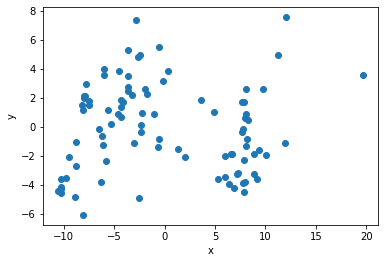

In [85]:
x_axis_data = sDf_pca['x']
y_axis_data = sDf_pca['y']

plt.scatter(x_axis_data, y_axis_data, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [86]:
from sklearn.cluster import KMeans

In [87]:
points = sDf.values
kmeans = KMeans(n_clusters=2).fit(points)
kmeans.cluster_centers_

array([[5.80967742e-02, 5.35806452e-02, 5.63225806e-02, 5.50645161e-02,
        5.47419355e-02, 5.41612903e-02, 5.20322581e-02, 5.30967742e-02,
        5.25161290e-02, 5.39677419e-02, 5.20000000e-02, 5.33548387e-02,
        5.19677419e-02, 5.17741935e-02, 5.06129032e-02, 4.91935484e-02,
        4.87419355e-02, 4.88387097e-02, 4.73870968e-02, 4.73225806e-02,
        4.69354839e-02, 4.75806452e-02, 4.80322581e-02, 4.75483871e-02,
        4.62258065e-02, 4.68064516e-02, 5.01290323e-02, 5.18387097e-02,
        6.91612903e-02, 5.40645161e-02, 4.79677419e-02, 4.75483871e-02,
        4.91935484e-02, 4.95806452e-02, 4.71935484e-02, 4.70645161e-02,
        4.74838710e-02, 4.98064516e-02, 4.78064516e-02, 4.87741935e-02,
        4.73225806e-02, 4.94516129e-02, 4.84193548e-02, 4.99354839e-02,
        4.92258065e-02, 5.07096774e-02, 5.20322581e-02, 5.02258065e-02,
        4.98387097e-02, 4.94193548e-02, 5.09032258e-02, 5.12580645e-02,
        4.98387097e-02, 4.77419355e-02, 4.93225806e-02, 5.138709

In [88]:
import seaborn as sns

In [89]:
sDf_pca["cluster"] = kmeans.labels_
sDf_pca["date"] = sDf.index

sDf_pca;

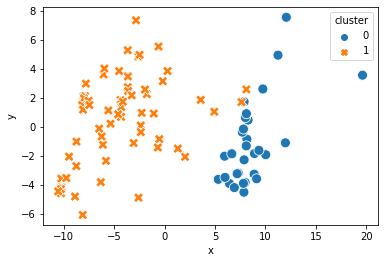

In [90]:
sns.scatterplot(x='x', y="y", hue="cluster", style="cluster", s = 100, data = sDf_pca)
plt.show()

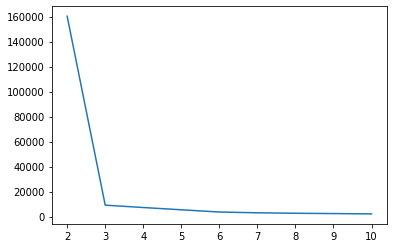

In [91]:
wcss = []
ks = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(sDf_pca)
    wcss.append(kmeans.inertia_)
    ks.append(k)
    
plt.plot(ks, wcss)

In [61]:
sDf_pca['cluster']
sDf_pca['date']

0     20180501
1     20180502
2     20180503
3     20180504
4     20180505
5     20180506
6     20180507
7     20180508
8     20180509
9     20180510
10    20180511
11    20180512
12    20180513
13    20180514
14    20180515
15    20180516
16    20180517
17    20180518
18    20180519
19    20180520
20    20180521
21    20180522
22    20180523
23    20180524
24    20180525
25    20180526
26    20180527
27    20180528
28    20180529
29    20180530
30    20180531
31    20190301
32    20190302
33    20190303
34    20190304
35    20190305
36    20190306
37    20190307
38    20190308
39    20190309
40    20190310
41    20190311
42    20190312
43    20190313
44    20190314
45    20190315
46    20190316
47    20190317
48    20190318
49    20190319
50    20190320
51    20190321
52    20190322
53    20190323
54    20190324
55    20190325
56    20190326
57    20190327
58    20190328
59    20190329
60    20190330
61    20190331
62    20190401
63    20190402
64    20190403
65    20190404
66    2019

In [92]:
cluster = pd.DataFrame({"cluster": sDf_pca['cluster'], "date": sDf_pca['date']})
cluster

,cluster,date
0,0,20180501
1,0,20180502
2,0,20180503
3,0,20180504
4,0,20180505
5,0,20180506
6,0,20180507
7,0,20180508
8,0,20180509
9,0,20180510


In [25]:
sDf['date'] = dts
sDf

ValueError: Length of values (365) does not match length of index (92)

In [93]:
initDf

,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,20180511,20180512,20180513,20180514,20180515,20180516,20180517,20180518,20180519,20180520,20180521,20180522,20180523,20180524,20180525,20180526,20180527,20180528,20180529,20180530,20180531,20180601,20180602,20180603,20180604,20180605,20180606,20180607,20180608,20180609,20180610,20180611,20180612,20180613,20180614,20180615,20180616,20180617,20180618,20180619,...,20190312,20190313,20190314,20190315,20190316,20190317,20190318,20190319,20190320,20190321,20190322,20190323,20190324,20190325,20190326,20190327,20190328,20190329,20190330,20190331,20190401,20190402,20190403,20190404,20190405,20190406,20190407,20190408,20190409,20190410,20190411,20190412,20190413,20190414,20190415,20190416,20190417,20190418,20190419,20190420,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
0,0.085,0.051,0.037,0.064,0.081,0.097,0.052,0.086,0.068,0.053,0.047,0.041,0.050,0.059,0.050,0.051,0.056,0.051,0.055,0.052,0.052,0.085,0.051,0.051,0.051,0.069,0.038,0.054,0.055,0.051,0.058,0.051,0.037,0.055,0.056,0.051,0.085,0.098,0.063,0.089,0.050,0.097,0.057,0.111,0.052,0.064,0.060,0.066,0.060,0.058,...,0.026,0.032,0.013,0.020,0.024,0.041,0.009,0.008,0.050,0.006,0.030,0.008,0.068,0.015,0.068,0.024,0.015,0.031,0.053,0.062,0.014,0.014,0.006,0.007,0.027,0.027,0.017,0.033,0.015,0.032,0.015,0.015,0.050,0.071,0.030,0.021,0.007,0.007,0.007,0.007,0.058,0.020,0.012,0.008,0.022,0.029,0.007,0.075,0.019,0.022
1,0.084,0.050,0.046,0.074,0.054,0.096,0.051,0.085,0.036,0.052,0.031,0.050,0.051,0.059,0.031,0.051,0.054,0.051,0.054,0.052,0.052,0.075,0.032,0.038,0.051,0.061,0.042,0.054,0.034,0.051,0.059,0.051,0.049,0.054,0.052,0.053,0.084,0.098,0.063,0.089,0.050,0.097,0.058,0.118,0.051,0.046,0.059,0.066,0.060,0.057,...,0.029,0.033,0.024,0.007,0.019,0.047,0.041,0.023,0.042,0.015,0.015,0.025,0.072,0.017,0.060,0.016,0.016,0.030,0.048,0.055,0.007,0.028,0.007,0.024,0.026,0.017,0.019,0.032,0.015,0.017,0.016,0.015,0.015,0.071,0.031,0.023,0.007,0.007,0.006,0.006,0.073,0.007,0.007,0.008,0.024,0.025,0.007,0.065,0.024,0.023
2,0.085,0.050,0.088,0.085,0.052,0.101,0.032,0.084,0.046,0.052,0.048,0.050,0.037,0.047,0.040,0.050,0.053,0.050,0.040,0.052,0.052,0.067,0.047,0.034,0.042,0.076,0.054,0.080,0.044,0.050,0.058,0.050,0.062,0.037,0.051,0.058,0.084,0.098,0.062,0.072,0.051,0.097,0.058,0.118,0.052,0.062,0.060,0.066,0.060,0.057,...,0.024,0.028,0.013,0.007,0.008,0.070,0.043,0.023,0.033,0.007,0.007,0.023,0.071,0.034,0.050,0.015,0.015,0.016,0.029,0.032,0.007,0.026,0.007,0.024,0.021,0.009,0.035,0.024,0.015,0.016,0.021,0.016,0.016,0.067,0.024,0.007,0.007,0.015,0.013,0.015,0.053,0.007,0.007,0.007,0.014,0.023,0.007,0.062,0.015,0.008
3,0.084,0.051,0.051,0.084,0.041,0.105,0.044,0.052,0.054,0.052,0.051,0.038,0.035,0.055,0.050,0.051,0.053,0.051,0.044,0.052,0.052,0.085,0.051,0.050,0.035,0.059,0.054,0.067,0.051,0.052,0.053,0.051,0.061,0.050,0.051,0.057,0.084,0.098,0.062,0.088,0.050,0.097,0.057,0.118,0.051,0.060,0.059,0.066,0.060,0.057,...,0.013,0.020,0.007,0.007,0.007,0.054,0.027,0.009,0.031,0.022,0.007,0.009,0.086,0.030,0.024,0.016,0.022,0.016,0.018,0.016,0.007,0.011,0.020,0.009,0.019,0.009,0.033,0.016,0.027,0.015,0.032,0.021,0.032,0.073,0.015,0.007,0.026,0.024,0.023,0.033,0.039,0.007,0.010,0.024,0.007,0.007,0.007,0.065,0.007,0.006
4,0.084,0.050,0.050,0.065,0.032,0.107,0.051,0.051,0.055,0.052,0.045,0.033,0.049,0.057,0.050,0.051,0.053,0.045,0.055,0.052,0.052,0.084,0.051,0.053,0.052,0.059,0.053,0.053,0.051,0.051,0.051,0.051,0.044,0.055,0.051,0.057,0.086,0.098,0.062,0.086,0.050,0.097,0.057,0.117,0.051,0.060,0.060,0.066,0.060,0.057,...,0.013,0.029,0.007,0.018,0.007,0.043,0.026,0.008,0.038,0.023,0.014,0.007,0.081,0.016,0.032,0.027,0.032,0.016,0.033,0.020,0.024,0.010,0.024,0.007,0.024,0.008,0.017,0.016,0.032,0.016,0.029,0.032,0.031,0.065,0.015,0.007,0.021,0.017,0.019,0.017,0.044,0.017,0.025,0.023,0.007,0.008,0.025,0.075,0.007,0.007
5,0.084,0.050,0.044,0.065,0.052,0.105,0.050,0.052,0.045,0.051,0.0

In [94]:
cluster.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
cluster,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
date,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,20180511,20180512,20180513,20180514,20180515,20180516,20180517,20180518,20180519,20180520,20180521,20180522,20180523,20180524,20180525,20180526,20180527,20180528,20180529,20180530,20180531,20190301,20190302,20190303,20190304,20190305,20190306,20190307,20190308,20190309,20190310,20190311,20190312,20190313,20190314,20190315,20190316,20190317,20190318,20190319,20190320,20190321,20190322,20190323,20190324,20190325,20190326,20190327,20190328,20190329,20190330,20190331,20190401,20190402,20190403,20190404,20190405,20190406,20190407,20190408,20190409,20190410,20190411,20190412,20190413,20190414,20190415,20190416,20190417,20190418,20190419,20190420,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430


In [95]:
merge_data = pd.merge(sDf, cluster)

In [96]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

merge_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,date,month,cluster
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,0.085,0.085,0.084,0.084,0.054,0.046,0.051,0.050,0.050,0.038,0.031,0.051,0.051,0.051,0.047,0.030,0.042,0.051,0.048,0.051,0.034,0.034,0.051,0.050,0.051,0.043,0.028,0.047,0.051,0.051,0.050,0.036,0.032,0.051,0.050,0.049,0.051,0.029,0.041,0.051,0.051,0.058,0.055,0.045,0.054,0.056,0.057,0.094,0.055,0.056,0.052,0.051,0.051,0.050,0.051,0.050,0.049,0.050,0.049,0.049,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.050,0.050,0.049,0.062,0.085,0.084,0.083,0.083,0.063,0.074,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,05,0
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,0.054,0.057,0.056,0.039,0.056,0.052,0.052,0.051,0.051,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.103,0.063,0.050,0.050,0.050,0.050,0.045,0.031,0.047,0.051,0.050,0.050,0.035,0.036,0.051,0.051,0.050,0.050,0.032,0.038,0.051,0.049,0.050,0.049,0.043,0.029,0.046,0.050,0.050,0.049,0.049,0.030,0.040,0.050,0.050,0.051,0.045,0.030,0.046,0.051,0.050,0.050,0.055,0.057,0.056,0.039,0.056,0.053,0.052,0.052,0.051,0.052,0.051,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,05,0
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,0.029,0.038,0.050,0.049,0.033,0.030,0.051,0.050,0.040,0.030,0.044,0.050,0.047,0.029,0.036,0.050,0.050,0.035,0.038,0.088,0.051,0.050,0.037,0.030,0.049,0.050,0.049,0.037,0.029,0.050,0.051,0.057,0.057,0.051,0.047,0.054,0.053,0.052,0.052,0.051,0.050,0.051,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.048,0.030,0.041,0.050,0.051,0.040,0.030,0.046,0.051,0.049,0.033,0.034,0.050,0.050,0.045,0.030,0.043,0.051,0.050,0.058,0.065,0.084,0.085,0.081,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,05,0
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,0.078,0.084,0.083,0.063,0.069,0.089,0.090,0.060,0.043,0.059,0.055,0.056,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.093,0.050,0.050,0.049,0.049,0.053,0.034,0.051,0.053,0.053,0.053,0.052,0.052,0.053,0.052,0.052,0.053,0.053,0.053,0.052,0.052,0.052,0.052,0.048,0.033,0.044,0.054,0.052,0.049,0.033,0.045,0.053,0.053,0.051,0.034,0.043,0.053,0.053,0.053,0.047,0.034,0.047,0.054,0.053,0.053,0.059,0.081,0.150,0.075,0.087,0.084,0.084,0.082,0.083,0.083,0.081,0.082,0.081,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,05,0
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,0.051,0.050,0.030,0.034,0.051,0.050,0.036,0.030,0.048,0.051,0.045,0.029,0.039,0.051,0.050,0.035,0.030,0.049,0.050,0.047,0.029,0.035,0.051,0.050,0.043,0.030,0.043,0.050,0.050,0.040,0.029,0.046,0.051,0.050,0.041,0.033,0.054,0.053,0.056,0.059,0.059,0.044,0.058,0.056,0.055,0.055,0.056,0.066,0.113,0.091,0.082,0.081,0.081,0.154,0.083,0.087,0.109,0.108,0.104,0.105,0.104,0.104,0.106,0.103,0.102,0.102,0.102,0.104,0.108,0.143,0.109,0.107,0.107,0.102,0.103,0.103,0.105,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,05,0
5,0.097,0.096,0.101,0.105,0.107,0.105,0.088,0.102,0.105,0.107,0.106,0.089,0.082,0.084,0.087,0.052,0.053,0.052,0.052,0.051,0.051,0.051,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.049,0.033,0.073,0.081,0.080,0.080,0.071,0.061,0.081,0.080,0.080,0.080,0.063,0.067,0.081,0.080,0.080,0.063,0.068,0.085,0.103,0.109,0.094,0.210,0.333,0.104,0.103,0.137,0.101,0.101,0.100,0.101,0.100,0.100,0.100,0.100,0.099,0.100,0.099,0.100,0.099,0.100,0.100,0.099,0.100,0.082,0.093,0.100,0.099,0.100,0.087,0.085,0.100,0.117,0.078,20180506,05,0
6,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0.041,0.051,0.050,0.047,0.030,0.046,0.050,0.050,0.036,0.036,0.051,0.050,0.04

In [82]:
cluster_5 = merge_data[merge_data['cluster'] == 2]['date']

In [83]:
cluster_5.values.tolist()

['20180724',
 '20180726',
 '20180731',
 '20180801',
 '20180802',
 '20180807',
 '20180808',
 '20180810',
 '20180814',
 '20180815',
 '20180816',
 '20180823']

In [84]:
sDf

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,date
20180501,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501
20180502,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502
20180503,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503
20180504,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504
20180505,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190426,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.065,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426
20190427,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.057,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427
20190428,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.066,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428
20190429,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.062,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429


In [85]:
bakSDf = sDf

In [89]:
sDf = bakSDf

In [118]:
bakMerge = merge_data

In [122]:
merge_data = bakMerge

In [143]:
def SeasonSplit(df, season):
    list = []
    if season == "SPRING":
        list = ["03", "04", "05"]
    elif season == "SUMMER":
        list = ["06", "07", "08"]
    elif season == "AUTUMN":
        list = ["09", "10", "11"]
    elif season == "WINTER":
        list = ["12", "01", "02"]
    
    return df[df['month'].isin(list)]

In [123]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,date,cluster
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,4
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,4
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,4
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,4
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,4
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0


In [132]:
month = []
for date in merge_data['date']:
    month.append(date[4:6])

merge_data['month'] = month

In [133]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,date,cluster,month
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,4,05
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,4,05
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,4,05
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,4,05
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,4,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0,04
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0,04
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,4,04
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0,04


In [144]:
SeasonSplit(merge_data, "SUMMER")

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,date,cluster,month
31,0.051,0.051,0.050,0.051,0.051,0.050,0.051,0.078,0.087,0.059,...,0.055,0.054,0.055,0.054,0.055,0.055,0.054,20180601,4,06
32,0.037,0.049,0.062,0.061,0.044,0.060,0.057,0.057,0.057,0.056,...,0.054,0.054,0.054,0.054,0.055,0.054,0.055,20180602,4,06
33,0.055,0.054,0.037,0.050,0.055,0.056,0.054,0.055,0.044,0.042,...,0.113,0.112,0.110,0.096,0.064,0.057,0.058,20180603,4,06
34,0.056,0.052,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,...,0.083,0.078,0.077,0.059,0.058,0.058,0.058,20180604,4,06
35,0.051,0.053,0.058,0.057,0.057,0.057,0.057,0.057,0.057,0.057,...,0.085,0.085,0.084,0.084,0.085,0.085,0.084,20180605,4,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.146,0.197,0.117,0.121,0.080,0.057,0.057,0.050,0.058,0.058,...,0.081,0.079,0.073,0.082,0.071,0.086,0.238,20180827,4,08
119,0.163,0.149,0.119,0.134,0.148,0.141,0.099,0.059,0.058,0.058,...,0.095,0.096,0.091,0.090,0.093,0.088,0.176,20180828,4,08
120,0.228,0.148,0.136,0.097,0.050,0.058,0.054,0.054,0.058,0.048,...,0.180,0.157,0.130,0.141,0.124,0.133,0.131,20180829,1,08
121,0.137,0.123,0.101,0.057,0.122,0.169,0.134,0.152,0.122,0.048,...,0.052,0.052,0.043,0.063,0.107,0.293,0.138,20180830,4,08


In [36]:
datetime.strptime("20180601", "%Y%m%d")

datetime.datetime(2018, 6, 1, 0, 0)

In [39]:
datetype = []
for data in merge_data['date']:
    datetype.append(datetime.strptime(data, "%Y%m%d"))

datetype

[datetime.datetime(2018, 5, 1, 0, 0),
 datetime.datetime(2018, 5, 2, 0, 0),
 datetime.datetime(2018, 5, 3, 0, 0),
 datetime.datetime(2018, 5, 4, 0, 0),
 datetime.datetime(2018, 5, 5, 0, 0),
 datetime.datetime(2018, 5, 6, 0, 0),
 datetime.datetime(2018, 5, 7, 0, 0),
 datetime.datetime(2018, 5, 8, 0, 0),
 datetime.datetime(2018, 5, 9, 0, 0),
 datetime.datetime(2018, 5, 10, 0, 0),
 datetime.datetime(2018, 5, 11, 0, 0),
 datetime.datetime(2018, 5, 12, 0, 0),
 datetime.datetime(2018, 5, 13, 0, 0),
 datetime.datetime(2018, 5, 14, 0, 0),
 datetime.datetime(2018, 5, 15, 0, 0),
 datetime.datetime(2018, 5, 16, 0, 0),
 datetime.datetime(2018, 5, 17, 0, 0),
 datetime.datetime(2018, 5, 18, 0, 0),
 datetime.datetime(2018, 5, 19, 0, 0),
 datetime.datetime(2018, 5, 20, 0, 0),
 datetime.datetime(2018, 5, 21, 0, 0),
 datetime.datetime(2018, 5, 22, 0, 0),
 datetime.datetime(2018, 5, 23, 0, 0),
 datetime.datetime(2018, 5, 24, 0, 0),
 datetime.datetime(2018, 5, 25, 0, 0),
 datetime.datetime(2018, 5, 26, 0,

In [41]:
merge_data['datetype'] = datetype

In [42]:
merge_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,date,month,cluster,datetype
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,0.085,0.085,0.084,0.084,0.054,0.046,0.051,0.050,0.050,0.038,0.031,0.051,0.051,0.051,0.047,0.030,0.042,0.051,0.048,0.051,0.034,0.034,0.051,0.050,0.051,0.043,0.028,0.047,0.051,0.051,0.050,0.036,0.032,0.051,0.050,0.049,0.051,0.029,0.041,0.051,0.051,0.058,0.055,0.045,0.054,0.056,0.057,0.094,0.055,0.056,0.052,0.051,0.051,0.050,0.051,0.050,0.049,0.050,0.049,0.049,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.050,0.050,0.049,0.062,0.085,0.084,0.083,0.083,0.063,0.074,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,05,0,2018-05-01
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,0.054,0.057,0.056,0.039,0.056,0.052,0.052,0.051,0.051,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.103,0.063,0.050,0.050,0.050,0.050,0.045,0.031,0.047,0.051,0.050,0.050,0.035,0.036,0.051,0.051,0.050,0.050,0.032,0.038,0.051,0.049,0.050,0.049,0.043,0.029,0.046,0.050,0.050,0.049,0.049,0.030,0.040,0.050,0.050,0.051,0.045,0.030,0.046,0.051,0.050,0.050,0.055,0.057,0.056,0.039,0.056,0.053,0.052,0.052,0.051,0.052,0.051,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,05,0,2018-05-02
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,0.029,0.038,0.050,0.049,0.033,0.030,0.051,0.050,0.040,0.030,0.044,0.050,0.047,0.029,0.036,0.050,0.050,0.035,0.038,0.088,0.051,0.050,0.037,0.030,0.049,0.050,0.049,0.037,0.029,0.050,0.051,0.057,0.057,0.051,0.047,0.054,0.053,0.052,0.052,0.051,0.050,0.051,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.048,0.030,0.041,0.050,0.051,0.040,0.030,0.046,0.051,0.049,0.033,0.034,0.050,0.050,0.045,0.030,0.043,0.051,0.050,0.058,0.065,0.084,0.085,0.081,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,05,0,2018-05-03
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,0.078,0.084,0.083,0.063,0.069,0.089,0.090,0.060,0.043,0.059,0.055,0.056,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.093,0.050,0.050,0.049,0.049,0.053,0.034,0.051,0.053,0.053,0.053,0.052,0.052,0.053,0.052,0.052,0.053,0.053,0.053,0.052,0.052,0.052,0.052,0.048,0.033,0.044,0.054,0.052,0.049,0.033,0.045,0.053,0.053,0.051,0.034,0.043,0.053,0.053,0.053,0.047,0.034,0.047,0.054,0.053,0.053,0.059,0.081,0.150,0.075,0.087,0.084,0.084,0.082,0.083,0.083,0.081,0.082,0.081,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,05,0,2018-05-04
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,0.051,0.050,0.030,0.034,0.051,0.050,0.036,0.030,0.048,0.051,0.045,0.029,0.039,0.051,0.050,0.035,0.030,0.049,0.050,0.047,0.029,0.035,0.051,0.050,0.043,0.030,0.043,0.050,0.050,0.040,0.029,0.046,0.051,0.050,0.041,0.033,0.054,0.053,0.056,0.059,0.059,0.044,0.058,0.056,0.055,0.055,0.056,0.066,0.113,0.091,0.082,0.081,0.081,0.154,0.083,0.087,0.109,0.108,0.104,0.105,0.104,0.104,0.106,0.103,0.102,0.102,0.102,0.104,0.108,0.143,0.109,0.107,0.107,0.102,0.103,0.103,0.105,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,05,0,2018-05-05
5,0.097,0.096,0.101,0.105,0.107,0.105,0.088,0.102,0.105,0.107,0.106,0.089,0.082,0.084,0.087,0.052,0.053,0.052,0.052,0.051,0.051,0.051,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.049,0.033,0.073,0.081,0.080,0.080,0.071,0.061,0.081,0.080,0.080,0.080,0.063,0.067,0.081,0.080,0.080,0.063,0.068,0.085,0.103,0.109,0.094,0.210,0.333,0.104,0.103,0.137,0.101,0.101,0.100,0.101,0.100,0.100,0.100,0.100,0.099,0.100,0.099,0.100,0.099,0.100,0.100,0.099,0.100,0.082,0.093,0.100,0.099,0.100,0.087,0.085,0.100,0.117,0.078,20180506,05,0,2018-05-06
6,0.052,0.051,0.032,0.044,0.051,0.050,0.043,0.030,0.050,0.051,0.050,0.034,0

In [50]:
# 0~6 : 월 ~ 일

merge_data[merge_data['datetype'].dt.weekday == 6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,date,month,cluster,datetype
5,0.097,0.096,0.101,0.105,0.107,0.105,0.088,0.102,0.105,0.107,0.106,0.089,0.082,0.084,0.087,0.052,0.053,0.052,0.052,0.051,0.051,0.051,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.049,0.033,0.073,0.081,0.080,0.080,0.071,0.061,0.081,0.080,0.080,0.080,0.063,0.067,0.081,0.080,0.080,0.063,0.068,0.085,0.103,0.109,0.094,0.210,0.333,0.104,0.103,0.137,0.101,0.101,0.100,0.101,0.100,0.100,0.100,0.100,0.099,0.100,0.099,0.100,0.099,0.100,0.100,0.099,0.100,0.082,0.093,0.100,0.099,0.100,0.087,0.085,0.100,0.117,0.078,20180506,05,0,2018-05-06
12,0.050,0.051,0.037,0.035,0.049,0.052,0.048,0.030,0.043,0.052,0.049,0.036,0.036,0.052,0.049,0.044,0.030,0.048,0.050,0.048,0.032,0.043,0.050,0.051,0.032,0.039,0.050,0.051,0.039,0.029,0.052,0.050,0.046,0.030,0.045,0.051,0.048,0.034,0.037,0.051,0.050,0.039,0.031,0.050,0.051,0.056,0.058,0.051,0.044,0.054,0.053,0.052,0.051,0.051,0.050,0.051,0.051,0.088,0.187,0.270,0.079,0.374,0.058,0.073,0.118,0.207,0.066,0.065,0.074,0.076,0.082,0.139,0.084,0.083,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.091,0.113,0.076,0.056,20180513,05,0,2018-05-13
19,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,0.052,20180520,05,0,2018-05-20
26,0.038,0.042,0.054,0.054,0.053,0.043,0.037,0.054,0.054,0.053,0.040,0.071,0.059,0.059,0.058,0.057,0.039,0.038,0.052,0.050,0.050,0.037,0.038,0.051,0.050,0.050,0.056,0.057,0.055,0.043,0.060,0.055,0.059,0.091,0.054,0.054,0.053,0.053,0.053,0.053,0.053,0.053,0.053,0.053,0.054,0.053,0.052,0.053,0.053,0.053,0.052,0.053,0.052,0.053,0.053,0.046,0.036,0.053,0.054,0.053,0.053,0.052,0.033,0.051,0.053,0.053,0.053,0.051,0.034,0.052,0.054,0.053,0.053,0.054,0.035,0.047,0.053,0.053,0.053,0.052,0.034,0.048,0.053,0.059,0.059,0.059,0.044,0.058,0.056,0.054,0.055,0.054,0.055,0.054,0.054,0.054,20180527,05,0,2018-05-27
33,0.023,0.021,0.022,0.021,0.064,0.071,0.061,0.060,0.059,0.068,0.082,0.036,0.022,0.022,0.022,0.038,0.031,0.021,0.021,0.020,0.030,0.037,0.023,0.021,0.021,0.021,0.037,0.033,0.021,0.021,0.021,0.029,0.037,0.025,0.021,0.021,0.021,0.035,0.034,0.021,0.021,0.021,0.027,0.078,0.073,0.067,0.067,0.067,0.062,0.063,0.049,0.046,0.053,0.054,0.062,0.057,0.054,0.046,0.046,0.062,0.068,0.051,0.046,0.045,0.053,0.064,0.058,0.060,0.060,0.061,0.085,0.085,0.070,0.167,0.077,0.087,0.092,0.080,0.075,0.078,0.079,0.092,0.071,0.060,0.060,0.060,0.042,0.039,0.026,0.023,0.022,0.027,0.038,0.029,0.021,0.021,20190303,03,1,2019-03-03
40,0.072,0.071,0.071,0.073,0.070,0.068,0.068,0.077,0.083,0.082,0.081,0.072,0.065,0.065,0.078,0.073,0.069,0.062,0.058,0.035,0.038,0.036,0.033,0.039,0.023,0.035,0.037,0.029,0.029,0.020,0.030,0.051,0.054,0.021,0.020,0.024,0.038,0.045,0.023,0.021,0.023,0.042,0.037,0.028,0.021,0.027,0.031,0.037,0.032,0.028,0.021,0.023,0.049,0.051,0.024,0.020,0.021,0.084,0.090,0.090,0.073,0.073,0.072,0.094,0.097,0.085,0.072,0.074,0.080,0.091,0.097,0.081,0.083,0.081,0.095,0.096,0.084,0.069,0.065,0.073,0.081,0.078,0.075,0.070,0.068,0.084,0.082,0.066,0.061,0.065,0.144,0.103,0.055,0.013,0.013,0.013,20190310,03,1,2019-03-10
47,0.041,0.047,0.070,0.054,0.043,0.042,0.032,0.011,0.024,0.018,0.007,0